## Final Project Submission

Please fill out:
* Student name: 

- ABIGAEL NYABAGA

- BEDAN CHEGE

- BERYL AGAI

- BRIAN MUTHAMA

- FARHIYA JARSO

- IAN KIPTOO

- JACKSON MUNENE

- KELSEY MAINA
* Student pace: part time
* Scheduled project review date/time: 2/05/2023
* Instructor name: Asha Deen/Lucille Kaleha
* Blog post URL:


# NORTHWESTERN COUNTY REAL ESTATE PROJECT

![housing](picture/Readme%20image%201.png)

# BUSINESS UNDERSTANDING.

# 1.1 Overview

As a major sector of the economy, the real estate market is highly dependent on several factors to achieve success, mainly precise house price forecasts. A real estate agency in a NorthWestern County is looking for help in determining the primary factors that affect property values within the region. This project uses data from the King County House Sales dataset, which contains past real estate sales data that includes information on a variety of properties such as the previous sale price and square footage of property. Some of the challenges that affect the real estate market are economic downturns like decrease in demand of property or increase in housing prices causing challenges of affordability and insufficient data that makes it difficult to make a recommendation system. A solution would be to create a combination of several multiple linear regression models in order to identify trends in the data. The project's objective is to create a thorough advice system for the agency that will help homeowners understand how house renovations may affect the estimated worth of their properties. 

# 1.2 Stakeholders

The stakeholders in this analysis are: 
- the real estate agency

- home owners

- potential investors 

- potential customers 

# 1.3 Business Problem

A real estate agency from a NorthWestern County tasked us to analyze how different features affect prices of homes since as stakeholders, they don't have a reliable system that offers data driven insights and predictions to these home prices. Based on the particular characteristics of the homeowner's property, we will use data analytics and predictive modeling through simple and multiple linear regression approaches to; help homeowners accurately assess the value of their own houses, investors find potentially discounted properties, and real estate agents will be able to counsel their customers on pricing approaches by predicting home prices with ease.

# 1.4 Objectives

The key objectives for this analysis are as follows;
1.	Predicting home prices: To create a predictive model that estimates increase in market value of home based on renovation factors.



2.	Identifying the most important features: To review which renovation variables have the highest impact on increasing estimated value of a home.
- How much is the likely increase in the sale price by adding an additional bathroom?
- How much is the likely increase in the sale price by adding an extension to the living space in the home?
- How much is the likely increase in the sale price by adding an additional bedroom?
- How much is the likely increase in the sale price by adding an extension to the lot in the home? 

3.	Monitoring real estate market trends: Real estate trends are used by investors to help them decide where and when to make investments by learning more about the regions with the highest and lowest average sale price as well as the most in-demand property types.


# DATA UNDERSTANDING

The research retrieves information from King County House Sales dataset which contains the `kc_house_data.csv` file used to forecast the sales price of homes in King County.

`Description`: It comprises of 21,597 housing observations and 20 house features along with a column indicating the home id. The data covers homes sold between May 2014 and May 2015

The columns in the dataset are:

Numerical Columns (15)

- date - Date house was sold

- price - Sale price (prediction target)

- bedrooms - Number of bedrooms

- bathrooms - Number of bathrooms

- sqft_living - Square footage of living space in the home

- sqft_lot - Square footage of the lot

- floors - Number of floors (levels) in house

- sqft_above - Square footage of house apart from basement

- sqft_basement - Square footage of the basement

- yr_built - Year when house was built

- yr_renovated - Year when house was renovated

- lat - Latitude coordinate

- long - Longitude coordinate

- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Categorical Columns (6)
- id - Unique ID for each home sold

- waterfront - Whether the house has a view to a waterfront

- view - how good the view of the property was

- condition - the condition of the house

- grade - overall grade of the house. Related to the construction and design of the house 

- zipcode - What zip code area the house is in


`Key variables:`
- price

- bedrooms

- sqft living

- sqft loft

- bathrooms


`Target Variable`: The `"price"` of the properties is the project's target variable. This indicates that other independent variables, such as the attributes of the property (square footage, number of bedrooms, etc.), are what predict the outcome or goal variable. The price of a property will be the variable being modeled in statistical modeling and analysis based on the values of other variables.

These variables will be utilized to provide answers to the data inquiries and provide the real estate firm with useful information on how to forecast prices based on characteristics that influence sales.


## Load data

### Library Imports
Begin with importing all the neccessary libraries and packages that will be useful during this project

In [90]:
# First we import packages to be used.
import markdown
import pandas as pd
import numpy as np
import csv
from pandas.api.types import is_numeric_dtype
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import scipy.stats as stats
import missingno as msno
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

plt.style.use('seaborn')

### Data cleaning
Functions are used to promotes modularity, reusability, abstraction, encapsulation and readability, all of which contribute to writing cleaner, more maintainable, and efficient codes. 
>We created a function that: 
>1. loads the data from the CSV file.
>2. Converts the date feature from object datatype to datetime format.  
>3. Splits the grade column into two columns to create two features: grade_ and grade_comments.

**N/B:** The split functions splits the grade feature to form two features one interger datatype and the other string datatype which gives comment on the grade.

In [2]:
def load_data(filepath):
    # Read CSV file
    data = pd.read_csv(filepath)
    
    # Convert 'date' column to datetime format
    data["date"] = pd.to_datetime(data['date'])
    
    # Split 'grade' column into 'grade_' and 'grade_comment'
    data[["grade_", "grade_comment"]] = (
        data["grade"].str.split(" ", n=1, expand=True)
    )

    return data

In [3]:
df = load_data("data/kc_house_data.csv")

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_,grade_comment
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,7,Average
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,7,Average
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,6,Low Average
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7,Average
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,8,Good


From the data loaded we can see the grade feature split to two features .This will be useful when performing statistical tests later on during our analysis,where we require numerical data compaired to categorical data. Also,the sqft_living, sqft_lot, sqft_above, sqft_living15, and sqft_lot15 columns represent continuous variables while the bedrooms, bathrooms, and floors columns have integer values.

We then use the pandas method $ df.info() $ to  retrieve concise information about the DataFrame, such as the number of non-null values in each column, the data type of each column, and memory usage.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

Notice that ,the datatype for the date feature is in date time format.Converting dates to datetime format enhances the consistency, flexibility, and functionality of your data, making it easier to work with and analyze.

From the information above we are able to identify the numerical data. Select the numerical data and use the $.describe()$  method to  quickly understanding the distribution and summary statistics of numerical data in your DataFrame, which can be helpful during data exploration and analysis.


In [6]:
df[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","sqft_above","sqft_basement","sqft_living15","sqft_lot15"]].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1986.620318,12758.283512
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,685.230472,27274.441950
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,399.000000,651.000000
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,6210.000000,871200.000000


From simply looking at this out come you can come up with a few observations:
* Some columns, like bedrooms and bathrooms, have a maximum value that seems unusually high compared to the other values in the dataset, suggesting potential **outliers**

These observations provide insights into the nature of the numerical variables in the dataset and can guide further analysis, such as identifying and handling outliers, understanding the relationships between variables, and selecting appropriate modeling techniques. 

To visualize the outliers we use boxplots. Below is a function boxplot_outliers() which is designed to visualize potential outliers in a DataFrame using box plots.The function is defined with two parameters: df (the DataFrame containing the data) and cols (a list of column names to visualize).

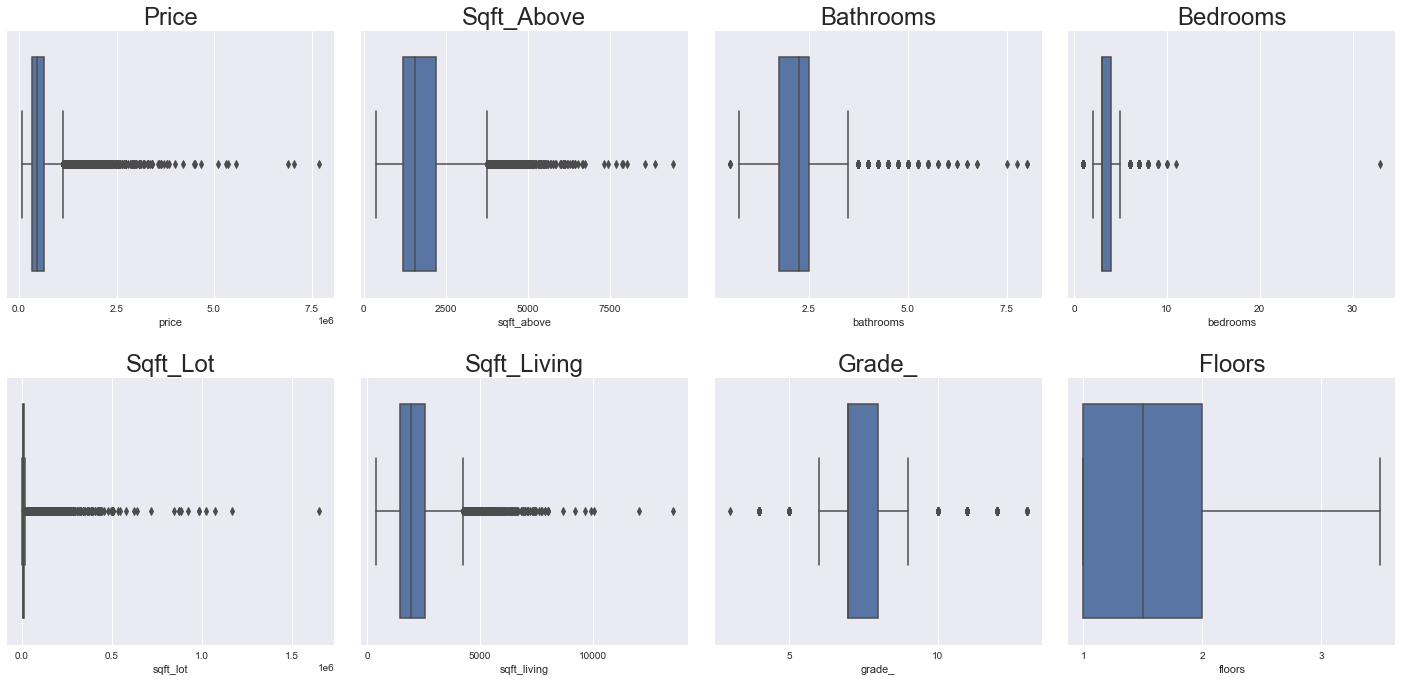

In [7]:
# function to visualize outliers 

def boxplot_outliers(df, cols):
    fig, axes = plt.subplots(2, 4, figsize=(20,10))
    axes = axes.ravel()
    sns.set(font_scale=2.0)
    for i, col in enumerate(cols):

        # convert the x-axis variable to a numeric data type
        
        df[col] = df[col].astype(float)
        sns.boxplot(x=df[col], ax=axes[i])
        
        axes[i].set_title(col.title())
    plt.tight_layout()

# specify the columns to plot

cols = ['price', 'sqft_above', 'bathrooms', 'bedrooms', 'sqft_lot', 'sqft_living', 'grade_', 'floors']

# call the plot_boxplots function

boxplot_outliers(df, cols)

Removing outliers from a dataset is a decision that depends on the context of your analysis and the specific goals of your project.It is imporntant to remove outliers in order to: preserving data integrity,improving model performance and enhancing interpretability of data. This function remove_outliers is designed to remove outliers from a given column in a DataFrame using the Z-score method. It is defined with two parameters: column (the column containing the data) and x (the threshold value for removing outliers).
>The selection of different z-score thresholds for each variable reflects considerations of the data's characteristics and analytical requirements. A z-score threshold of 4 is applied to price and bathrooms, as these variables may exhibit extreme values due to the nature of the data, such as high-end properties or properties with numerous bathrooms. Sqft_above and sqft_lot, representing physical property attributes, use a z-score threshold of 3 to capture outliers within a reasonable range without being overly aggressive. Bedrooms, being a discrete variable with a smaller range, employ a z-score threshold of 2 to detect moderately deviating outliers. These varying thresholds balance the detection of outliers with data integrity preservation, ensuring an effective approach tailored to each variable's variability and expected value range.

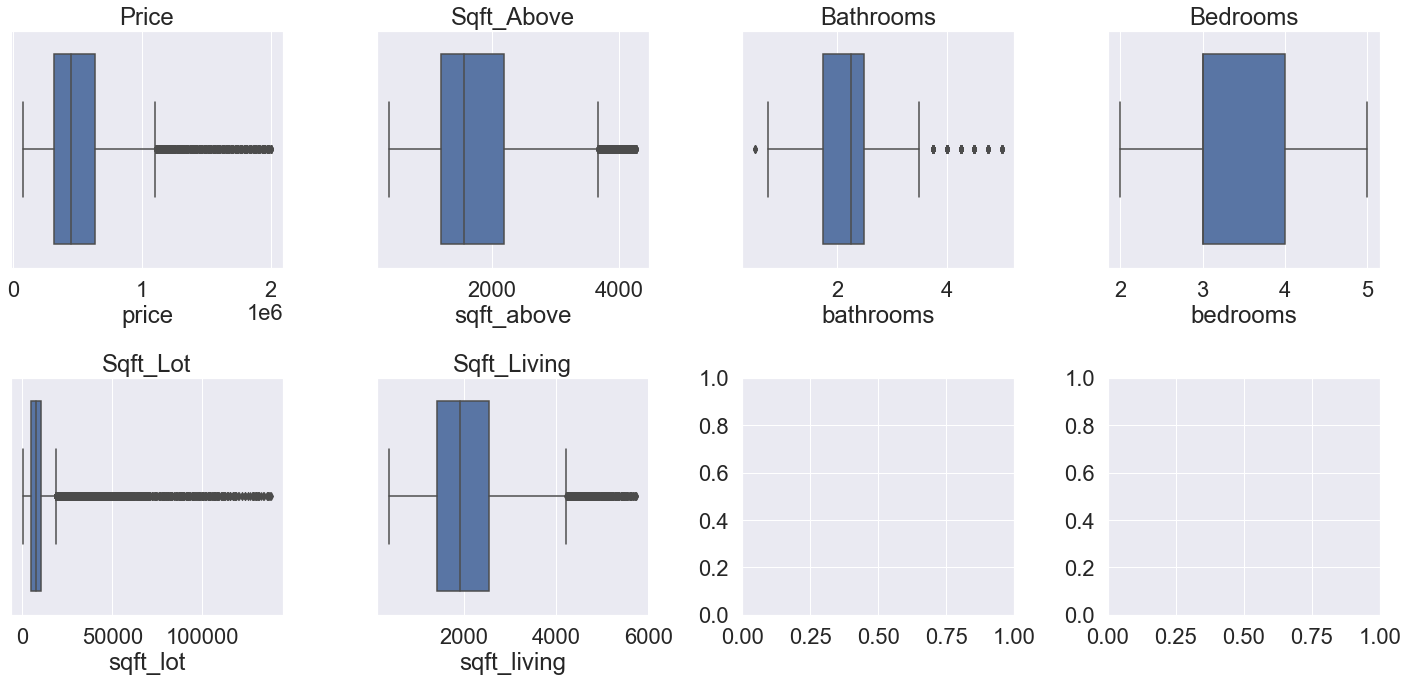

In [8]:
# function to remove outliers

def remove_outliers(column,x):
    new_column = column[(np.abs(stats.zscore(column))<x)]
    return new_column
# remove outliers for price
price = remove_outliers(df.price, 4)

# remove outliers for sqft_above
sqft_above_ground = remove_outliers(df.sqft_above, 3)

# remove outliers for bathrooms
bathrooms = remove_outliers(df.bathrooms, 4)

# remove outliers for bedrooms
bedrooms = remove_outliers(df.bedrooms, 2)

# remove outliers for sqft_lot

sqft_lot = remove_outliers(df.sqft_lot, 3)

# remove outliers for sqft_living
sqft_living = remove_outliers(df.sqft_living, 4)
gradee = remove_outliers(df.grade_, 1.5)

# combine all columns into a single dataframe
columns = pd.concat([price, sqft_above_ground, bathrooms, bedrooms, sqft_lot, sqft_living, gradee], axis=1)
# cols = [price, sqft_above_ground, bathrooms, bedrooms, sqft_lot, sqft_living, grade_]
# plot box plots for all columns
boxplot_outliers(columns,columns.columns[:6])


We then check for missing values in our dataset.This is done usin the  .𝑖𝑠𝑛𝑎()
  pandas method which returns a DataFrame of the same shape as the original DataFrame, where each element is True if the corresponding element in the original DataFrame is NaN, and False if otherwise.This is done to ensure data inegrity , Model Performance as many machine learning algorithms cannot handle missing values, data quality, bias reduction and for better data interpretability.

In [9]:
#checking for missing values

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
grade_              0
grade_comment       0
dtype: int64

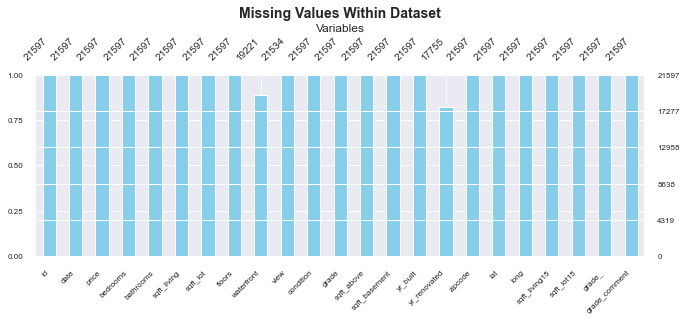

In [10]:
# Visualize missing values with missingno library
plt.figure(figsize=(10, 5))
msno.bar(df, color='skyblue', figsize=(10, 5), fontsize=8)
plt.title('Missing Values Within Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Percentage of Missing Values', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

It  is evident that three features have null values i.e waterfront,view and  yr_renovated. When considerinf if we should drop or replace the null values we look at **impact on Analysis** and **amount of missing Data**. If only a small percentage of values are missing, imputation methods like mean, median, or mode can be suitable but if a large portion of the data is missing, dropping the column or row may be more appropriate to avoid biasing the analysis.

In [11]:
# Checking for duplicates
df.duplicated().value_counts()

False    21597
dtype: int64

In [12]:
df.shape

(21597, 23)

In [13]:
#Categoricals
#waterfront and view also have nulls
#grade and condition dont
df['grade'].value_counts()
print(df['grade'].unique())

['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']


In [14]:
#cheking the Waterfront variable
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [15]:
# replacing the null values in waterfront with UNVERIFIED
df['waterfront'] = df['waterfront'].fillna('UNVERIFIED')

In [16]:
#  confirming null values in waterfront
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
grade_              0
grade_comment       0
dtype: int64

In [17]:
#checking the view variable
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [18]:
#dropping the nulls in view column 
# df['view'].dropna(inplace=True)
df.dropna(subset = ["view"], inplace=True)


In [19]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
grade_              0
grade_comment       0
dtype: int64

In [20]:
#dropping the nulls in yr-renovated column 
df.dropna(subset = ["yr_renovated"], inplace=True)

In [21]:
# confirming for nulls
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
grade_           0
grade_comment    0
dtype: int64

In [22]:
df['condition'].value_counts()

Average      11494
Good          4629
Very Good     1414
Fair           144
Poor            23
Name: condition, dtype: int64

In [23]:
df['sqft_basement'].value_counts()

0.0       10524
?           364
600.0       176
500.0       170
400.0       163
          ...  
861.0         1
2130.0        1
1275.0        1
768.0         1
1024.0        1
Name: sqft_basement, Length: 285, dtype: int64

In [24]:
#The sqft_basement has ? as a variable making it an object, fixing that;
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = 0 # convert ? to 0
df.sqft_basement = df.sqft_basement.astype(np.float64) # change from string
df['sqft_basement']

0           0.0
1         400.0
3         910.0
4           0.0
5        1530.0
          ...  
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: sqft_basement, Length: 17704, dtype: float64

In [25]:
# confirming there's no ?
df['sqft_basement'].value_counts()

0.0       10888
600.0       176
500.0       170
700.0       163
400.0       163
          ...  
518.0         1
2220.0        1
1525.0        1
283.0         1
266.0         1
Name: sqft_basement, Length: 284, dtype: int64

In [26]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'grade_',
       'grade_comment'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17704 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             17704 non-null  int64         
 1   date           17704 non-null  datetime64[ns]
 2   price          17704 non-null  float64       
 3   bedrooms       17704 non-null  float64       
 4   bathrooms      17704 non-null  float64       
 5   sqft_living    17704 non-null  float64       
 6   sqft_lot       17704 non-null  float64       
 7   floors         17704 non-null  float64       
 8   waterfront     17704 non-null  object        
 9   view           17704 non-null  object        
 10  condition      17704 non-null  object        
 11  grade          17704 non-null  object        
 12  sqft_above     17704 non-null  float64       
 13  sqft_basement  17704 non-null  float64       
 14  yr_built       17704 non-null  int64         
 15  yr_renovated   1770

## Exploratory Data Analysis

In [28]:
#Check numnber of rows and columns 
df.shape

(17704, 23)

In [29]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_
count,1.770400e+04,1.770400e+04,17704.000000,17704.000000,17704.000000,1.770400e+04,17704.000000,17704.000000,17704.000000,17704.000000,17704.000000,17704.000000,17704.000000,17704.000000,17704.000000,17704.000000,17704.000000
mean,4.585206e+09,5.403686e+05,3.378163,2.120481,2083.766211,1.526829e+04,1.495933,1791.561850,286.345798,1971.115511,83.765025,98077.752655,47.559385,-122.213428,1989.590827,12854.405953,7.661432
std,2.876543e+09,3.676424e+05,0.932847,0.767135,916.678619,4.205896e+04,0.538560,826.548819,440.625538,29.352504,400.239690,53.487004,0.138524,0.140881,684.696068,27691.476046,1.170217
min,1.000102e+06,8.000000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000,3.000000
25%,2.125320e+09,3.218375e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.469475,-122.328000,1490.000000,5100.000000,7.000000
50%,3.904990e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.603500e+03,1.500000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571050,-122.229000,1840.000000,7620.000000,7.000000
75%,7.325750e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068425e+04,2.000000,2220.000000,550.000000,1997.000000,0.000000,98117.000000,47.677300,-122.124000,2370.000000,10093.250000,8.000000
max,9.895000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,13.000000


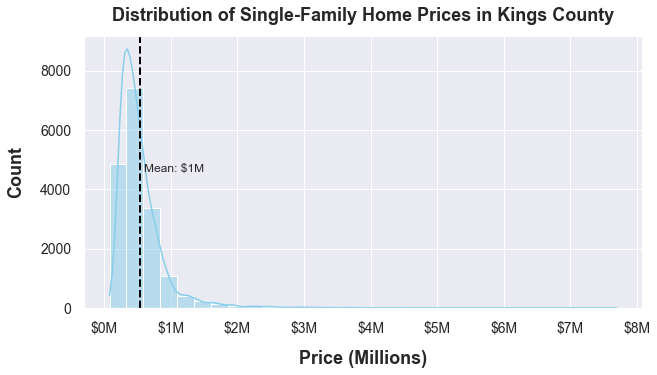

In [30]:
# Set figure size
plt.figure(figsize=(10, 5))

# Create histogram with Seaborn
sns.histplot(df['price'] / 1e6, bins=30, kde=True, color='skyblue')  # Divide by 1e6 to convert prices to millions

# Plot vertical line representing mean price
plt.axvline(df['price'].mean() / 1e6, color='black', linestyle='dashed', linewidth=2)  # Divide by 1e6 to convert mean price to millions

# Annotate mean price on the plot
plt.text((df['price'].mean() / 1e6) * 1.1, plt.ylim()[1] * 0.5, 'Mean: ${:,.0f}M'.format(df['price'].mean() / 1e6), fontsize=12)

# Format xticks by including $ sign, adding commas, and removing decimals
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}M'))  # Update tick labels to display prices in millions

# Set font properties for x and y tick labels
plt.tick_params(axis='x', labelsize=14)  # Adjust the font size for x-axis tick labels
plt.tick_params(axis='y', labelsize=14)  # Adjust the font size for y-axis tick labels

# Set labels and title
plt.xlabel('Price (Millions)', fontweight="bold", fontsize=18, labelpad=15)
plt.ylabel('Count', fontweight="bold", fontsize=18, labelpad=15)
plt.title('Distribution of Single-Family Home Prices in Kings County', fontweight="bold", fontsize=18, pad=15)

# Show plot
plt.show()


In [31]:
print("The skewness of the price column", df['price'].skew())
print("The kurtosis of the price column", df['price'].kurt())

The skewness of the price column 4.105236122091621
The kurtosis of the price column 36.382780217324175


The density plot highlights a departure from the typical bell-shaped curve of a normal distribution, revealing pronounced positive skewness. This indicates that a majority of house sales occurred below the average price, leading to an extended tail towards higher prices. Additionally, the plot demonstrates a leptokurtic kurtosis, indicating a surplus of outliers with elongated tails.

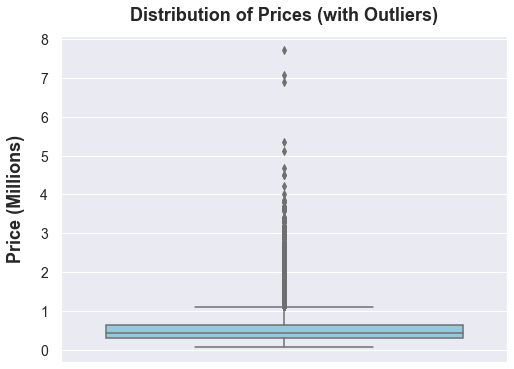

In [33]:
# Visualizing the outliers 

# Convert price to millions
df['price_millions'] = df['price'] / 1_000_000

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='price_millions', color='skyblue')

# Set y-label and title
plt.ylabel('Price (Millions)', fontweight='bold', fontsize=18, labelpad=15)
plt.title('Distribution of Prices (with Outliers)', fontweight='bold', fontsize=18, pad=15)

# Set font properties for x and y tick labels
plt.tick_params(axis='x', labelsize=14)  # Adjust the font size for x-axis tick labels
plt.tick_params(axis='y', labelsize=14)  # Adjust the font size for y-axis tick labels

# Format y-tick labels
# plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}M'))

plt.show()


### Unveiling Home Characteristics: Analyzing Bathroom, Bedroom, and Floor Counts in the Dataset


To gain a better understanding of the characteristics of homes in the area, we used the mode function to compare the number of bathrooms, bedrooms, and floors in the dataset. By identifying the most common values for these features, we aimed to provide insights into the typical configuration of homes in the area.

In [34]:
def get_mode(data, column):
    """Calculate the mode of a column in the dataset."""
    return data[column].mode()

# Calculate the mode for bathrooms
bathrooms_mode = get_mode(df, 'bathrooms')
print("Mode of bathrooms:", bathrooms_mode)

# Calculate the mode for bedrooms
bedrooms_mode = get_mode(df, 'bedrooms')
print("Mode of bedrooms:", bedrooms_mode)

# Calculate the mode for floors
floors_mode = get_mode(df, 'floors')
print("Mode of floors:", floors_mode)


Mode of bathrooms: 0    2.5
dtype: float64
Mode of bedrooms: 0    3.0
dtype: float64
Mode of floors: 0    1.0
dtype: float64



To visually represent the findings of the mode calculations for bathrooms, bedrooms, and floors, we
created a bar chart. Each bar in the chart corresponds to the mode value for each feature. This visualization provides a clear comparison of the most common configurations of these features in the dataset.

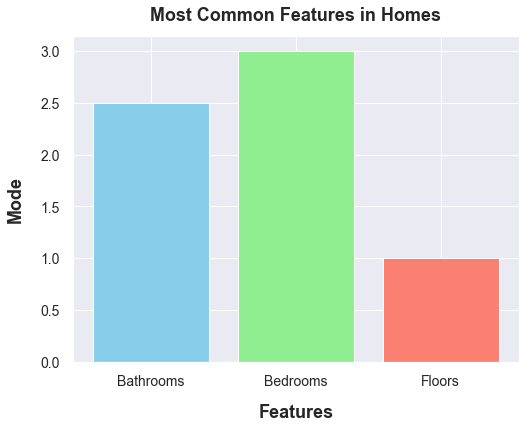

In [41]:
# Create a bar chart to visualize the modes
plt.figure(figsize=(8, 6))

# Set font properties for x and y tick labels
plt.tick_params(axis='x', labelsize=14)  # Adjust the font size for x-axis tick labels
plt.tick_params(axis='y', labelsize=14)  # Adjust the font size for y-axis tick labels

plt.bar(['Bathrooms', 'Bedrooms', 'Floors'], [bathrooms_mode[0], bedrooms_mode[0], floors_mode[0]], color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Features', fontweight="bold", fontsize=18, labelpad=15)
plt.ylabel('Mode', fontweight="bold", fontsize=18, labelpad=15)
plt.title('Most Common Features in Homes', fontweight="bold", fontsize=18, pad=15)

plt.show()

The analysis reveals that the majority of homes in the dataset have at least 3 bedrooms, 2 bathrooms, and 1 floor.

### Correlation

In [43]:
def get_correlation_df(df):
    # Convert non-numeric values to NaN
    df_numeric = df.apply(pd.to_numeric, errors='coerce')
    
    # Calculate correlation matrix
    corr_df = df_numeric.corr().abs().stack().reset_index()
    corr_df.columns = ['level_0', 'level_1', 'correlation']
    
    # Sort by correlation
    corr_df = corr_df.sort_values(by='correlation', ascending=False)
    
    return corr_df

# Get correlation dataframe
corr_df = get_correlation_df(df)

# Print correlation dataframe
print(corr_df)


           level_0        level_1  correlation
0               id             id     1.000000
200       yr_built       yr_built     1.000000
60        bedrooms       bedrooms     1.000000
80       bathrooms      bathrooms     1.000000
100    sqft_living    sqft_living     1.000000
..             ...            ...          ...
191       yr_built           date     0.001816
35            date     sqft_lot15     0.001588
305     sqft_lot15           date     0.001588
224   yr_renovated  sqft_living15     0.000665
296  sqft_living15   yr_renovated     0.000665

[361 rows x 3 columns]


The correlation analysis reveals high correlations between square footage-related features and property grade, suggesting potential multicollinearity issues. For instance, 'sqft_above' and 'sqft_living' exhibit a correlation of 0.876, indicating redundant information about property size, which can lead to multicollinearity in predictive modeling.

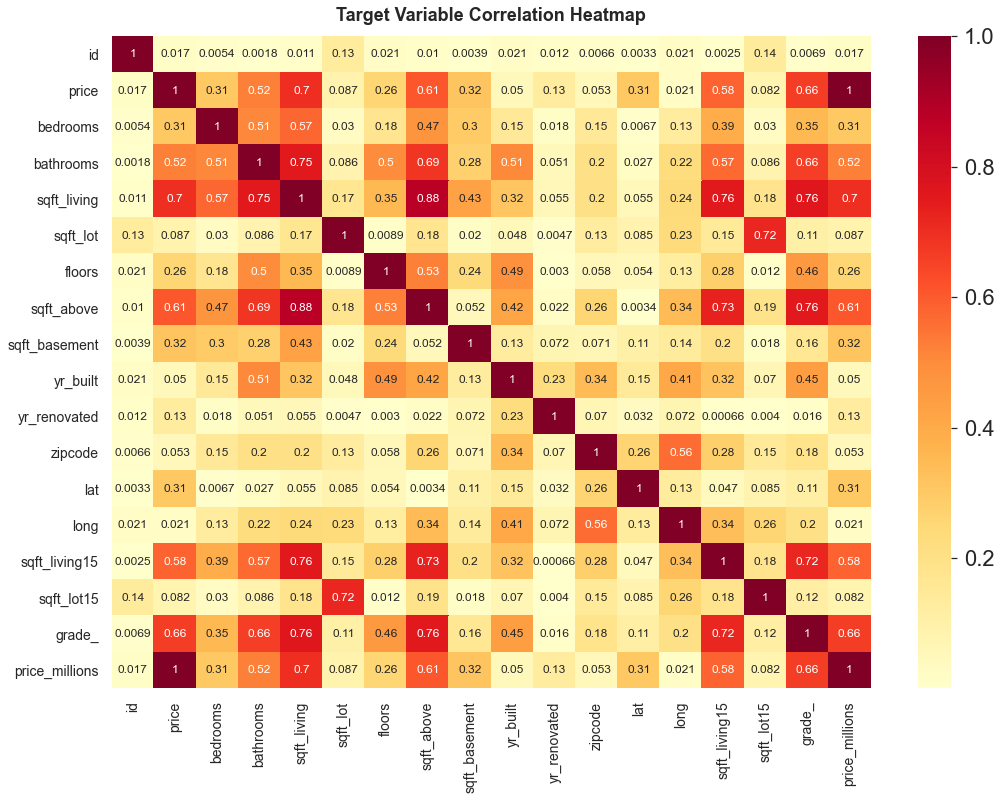

In [44]:
# Set up heatmap
fig, ax = plt.subplots(figsize=(17, 12))

# Calculate correlation matrix
corr = df.corr().abs()

# Plot heatmap with smaller font size
heatmap = sns.heatmap(corr, cmap='YlOrRd', annot=True, annot_kws={"size": 12}, ax=ax)

# Set font properties for x and y tick labels
ax.tick_params(axis='x', labelsize=14)  # Adjust the font size for x-axis tick labels
ax.tick_params(axis='y', labelsize=14)  # Adjust the font size for y-axis tick labels


# Add title
ax.set_title("Target Variable Correlation Heatmap", fontweight="bold", fontsize=18, pad=15)


# plt.yticks(fontsize=15)  # Adjust font size here


plt.show()


Correlation values, ranging from -1 to 1, elucidate the strength and direction of linear relationships between variables. A correlation of 1 signifies a perfect positive relationship, -1 indicates a perfect negative correlation, and 0 implies no linear association. While high absolute values suggest strong connections, it's crucial to note that correlation does not infer causation, a principle paramount in industry projects.

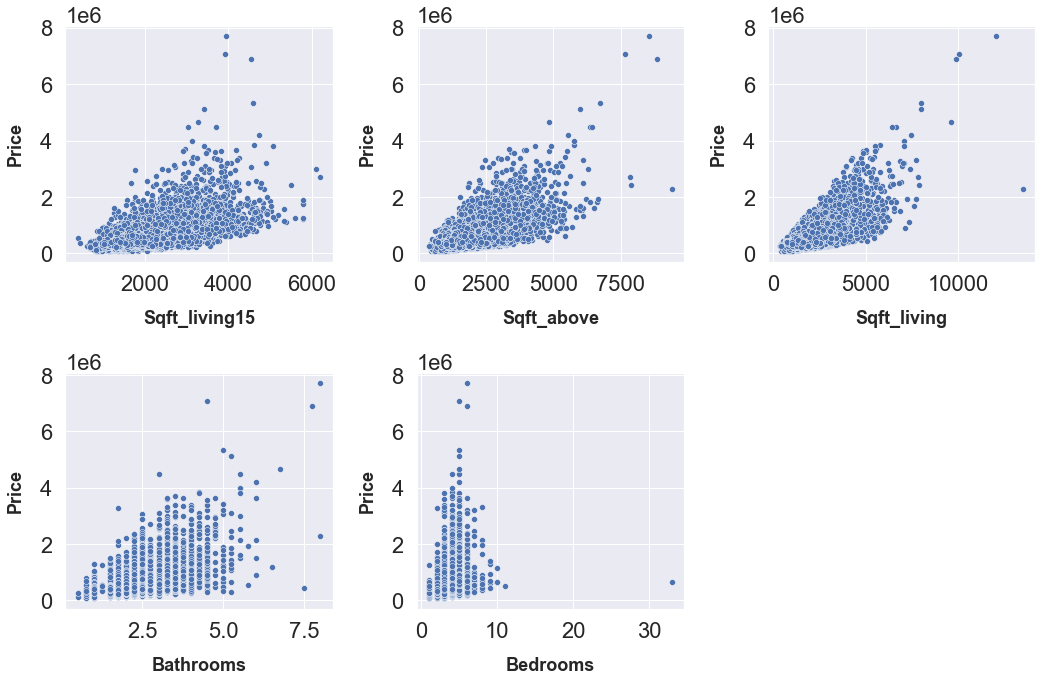

In [46]:
# Define the top 5 correlated variables
top_correlated_variables = ['sqft_living15', 'sqft_above', 'sqft_living', 'bathrooms', 'bedrooms']

# Calculate the number of rows and columns for subplots
num_variables = len(top_correlated_variables)
num_rows = 2
num_cols = (num_variables + num_rows - 1) // num_rows  # Calculate number of columns

# Create subplots for each pair of variables
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes if there are more than one row
axes = axes.flatten()

# Loop through each variable and create a scatter plot
for i, variable in enumerate(top_correlated_variables):
    sns.scatterplot(x=df[variable], y=df['price'], ax=axes[i])
#     axes[i].set_title(f'Scatter Plot of {variable.capitalize()} vs Price', fontsize=14)
    axes[i].set_xlabel(variable.capitalize(), fontsize=18, fontweight="bold", labelpad=15)
    axes[i].set_ylabel('Price', fontsize=18, fontweight="bold", labelpad=15)

# Hide empty subplot(s) if the number of variables is not a multiple of the number of rows
if len(axes) > num_variables:
    for j in range(num_variables, len(axes)):
        axes[j].axis('off')

plt.tight_layout()
plt.show()


## Home Location

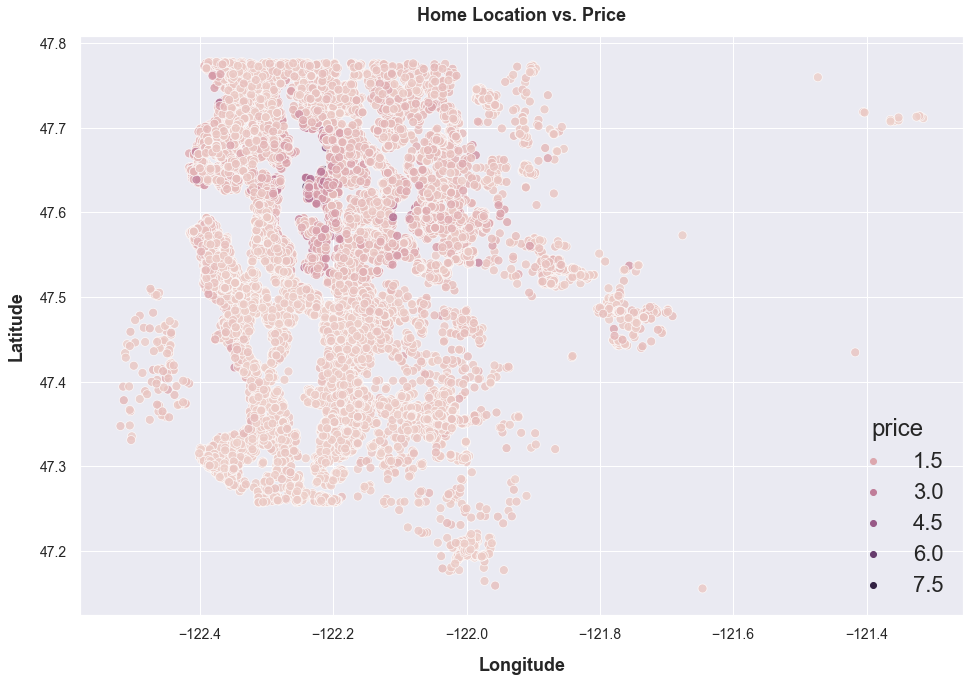

In [47]:
plt.figure(figsize=(14, 10))

# Set font properties for x and y tick labels
plt.tick_params(axis='x', labelsize=14)  # Adjust the font size for x-axis tick labels
plt.tick_params(axis='y', labelsize=14)  # Adjust the font size for y-axis tick labels

plt.title('Home Location vs. Price', fontweight='bold', fontsize=18, pad=15)
# Adjusting colormap parameters for better clarity
sns.scatterplot(x=df['long'], y=df['lat'], hue=df['price'], cmap='coolwarm', 
                hue_norm=(df['price'].min(), df['price'].max()), s=80, alpha=0.8)

plt.xlabel('Longitude', fontweight='bold', fontsize=18, labelpad=15)
plt.ylabel('Latitude', fontweight='bold', fontsize=18, labelpad=15)
plt.tight_layout()
plt.show()


We harnessed longitude and latitude coordinates to craft a map delineating property price distribution across Kings County. This visual depiction provides comprehensive insights into regional nuances, elucidating geographical disparities in property values. Furthermore, these coordinates serve as pivotal geospatial markers, facilitating deeper spatial analysis to unearth location-specific trends within the dataset.

## Visualizing Trends

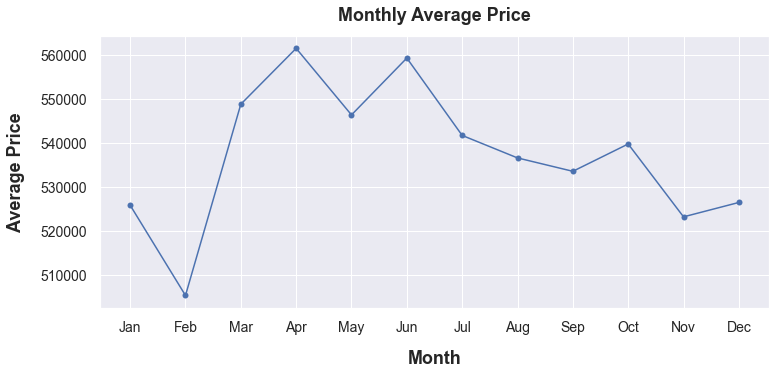

In [48]:
# Create a new column 'month' to store the month extracted from the 'date' column
df['month'] = df['date'].dt.month

# Create a grouped DataFrame by month and calculate the mean price for each month
monthly_avg_price = df.groupby('month')['price'].mean()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Plot the monthly average prices
ax.plot(monthly_avg_price.index, monthly_avg_price.values, marker='o', linestyle='-')

# Set font properties for x and y tick labels
ax.tick_params(axis='x', labelsize=14)  # Adjust the font size for x-axis tick labels
ax.tick_params(axis='y', labelsize=14)  # Adjust the font size for y-axis tick labels

# Set plot title and axis labels
ax.set_title('Monthly Average Price', fontweight='bold', fontsize=18, pad=15)
ax.set_xlabel('Month', fontweight='bold', fontsize=18, labelpad=15)
ax.set_ylabel('Average Price', fontweight='bold', fontsize=18, labelpad=15)

# Set x-axis ticks to correspond to months
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Display the plot
plt.show()


The analysis of the monthly average price trends reveals distinct patterns throughout the year. From January to February, there is a notable decrease, followed by a consistent increase from February to April, reaching its peak. However, April marks a subsequent decrease, with fluctuations observed until December, where prices rebound. Notably, February records the lowest average price, contrasting with April, which demonstrates the highest. These insights inform strategic decision-making processes within the data science industry, highlighting seasonal variations and potential market opportunities.

## Dealing with Categorical Variables

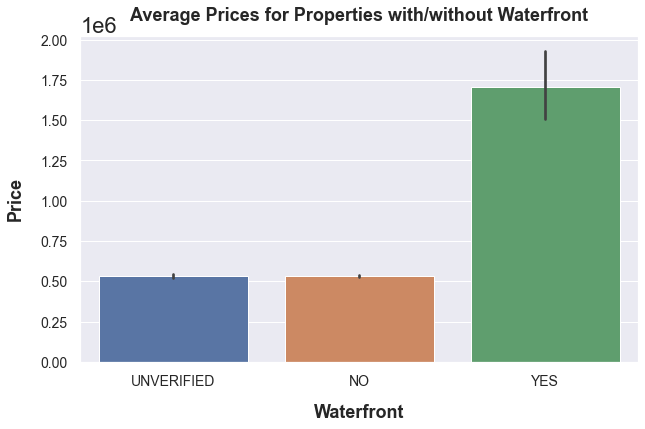

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='waterfront', y='price', data=df, ax=ax)
# Set font properties for x and y tick labels
ax.tick_params(axis='x', labelsize=14)  # Adjust the font size for x-axis tick labels
ax.tick_params(axis='y', labelsize=14)  # Adjust the font size for y-axis tick labels

ax.set_xlabel('Waterfront', fontweight='bold', fontsize=18, labelpad=15)
ax.set_ylabel('Price', fontweight='bold', fontsize=18, labelpad=15)
ax.set_title('Average Prices for Properties with/without Waterfront', fontweight='bold', fontsize=18,pad=15)
plt.show()


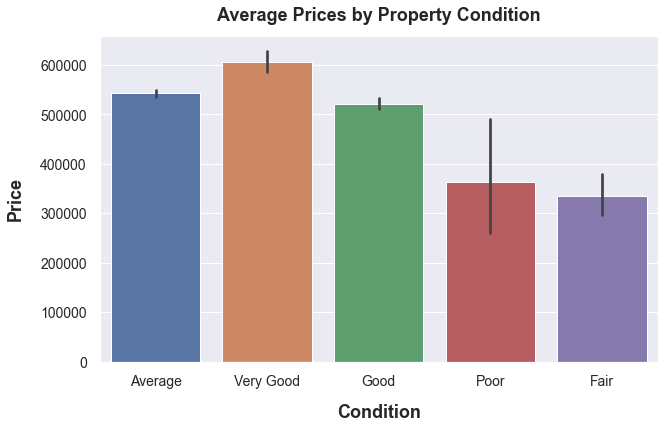

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x='condition', y='price', ax=ax)
# Set font properties for x and y tick labels
ax.tick_params(axis='x', labelsize=14)  # Adjust the font size for x-axis tick labels
ax.tick_params(axis='y', labelsize=14)  # Adjust the font size for y-axis tick labels

ax.set_xlabel('Condition', fontweight='bold', fontsize=18, labelpad=15)
ax.set_ylabel('Price', fontweight='bold', fontsize=18, labelpad=15)
ax.set_title('Average Prices by Property Condition', fontweight='bold', fontsize=18, pad=15)
plt.show()


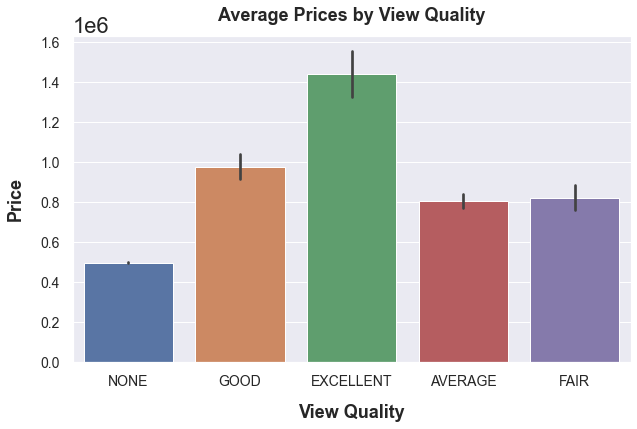

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x='view', y='price', ax=ax)
# Set font properties for x and y tick labels
ax.tick_params(axis='x', labelsize=14)  # Adjust the font size for x-axis tick labels
ax.tick_params(axis='y', labelsize=14)  # Adjust the font size for y-axis tick labels

ax.set_xlabel('View Quality', fontweight='bold', fontsize=18, labelpad=15)
ax.set_ylabel('Price', fontweight='bold', fontsize=18, labelpad=15)
ax.set_title('Average Prices by View Quality', fontweight='bold', fontsize=18, pad=15)
plt.show()


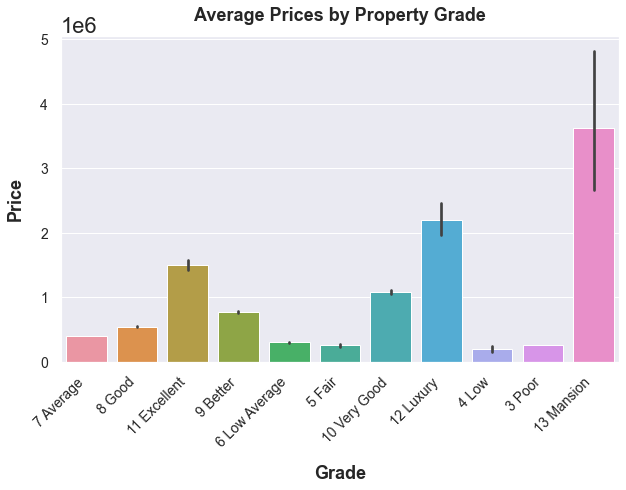

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x='grade', y='price', ax=ax)
# Set font properties for x and y tick labels
ax.tick_params(axis='x', labelsize=14)  # Adjust the font size for x-axis tick labels
ax.tick_params(axis='y', labelsize=14)  # Adjust the font size for y-axis tick labels

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel('Grade', fontweight='bold', fontsize=18, labelpad=15)
ax.set_ylabel('Price', fontweight='bold', fontsize=18, labelpad=15)
ax.set_title('Average Prices by Property Grade', fontweight='bold', fontsize=18, pad=15)
plt.show()


The visual representations suggest a notable trend: properties in superior condition and boasting exceptional views tend to yield higher price points. This observation underscores the significant impact of these attributes on property valuation within the real estate sector, providing actionable insights for strategic decision-making and market positioning.

## Baseline Model

In [53]:
# Create feature matrix X and target vector y
features = ["bathrooms"]
target = "price"
X = df[features]
y = df[target]


# Baseline for regression problem to be set by mean()
y_mean = y.mean()

# list of y_mean()
y_pred_baseline = [y_mean]*len(y)


len(y_pred_baseline)

17704

In [54]:
len(y_pred_baseline) == len(y)

True

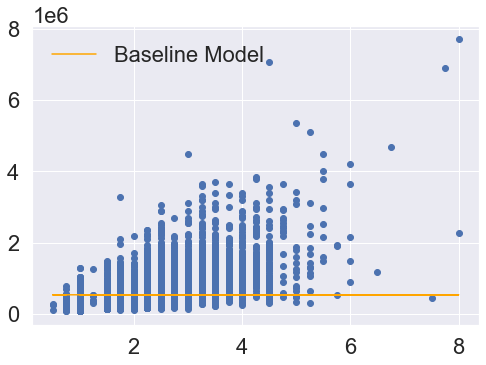

In [55]:
# visualize the y_pred_baseline (linear Regression)
plt.plot(X.values, y_pred_baseline, color="orange", label="Baseline Model")
plt.scatter(X, y)
plt.legend();

In [56]:
# Performance matrix (MAE)
mae_baseline = mean_absolute_error(y, y_pred_baseline)
print("Mean house price: ", round(y_mean,2))
print("MAE baseline: ", round(mae_baseline,2))
print("This means whenever we use this model, we will be off the the actual house prices by less than", mae_baseline)

Mean house price:  540368.56
MAE baseline:  233684.32
This means whenever we use this model, we will be off the the actual house prices by less than 233684.31606113407


In [57]:
#Encoding the categorical variable
def categorical_encoding(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns # Identify categorical columns
    dataframe_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True) #one-hot encoding 
    return dataframe_encoded
df = categorical_encoding(df)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,grade_comment_Better,grade_comment_Excellent,grade_comment_Fair,grade_comment_Good,grade_comment_Low,grade_comment_Low Average,grade_comment_Luxury,grade_comment_Mansion,grade_comment_Poor,grade_comment_Very Good
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,1180.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,2170.0,400.0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,1050.0,910.0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,1680.0,0.0,...,0,0,0,1,0,0,0,0,0,0
5,7237550310,2014-05-12,1230000.0,4.0,4.50,5420.0,101930.0,1.0,3890.0,1530.0,...,0,1,0,0,0,0,0,0,0,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17704 entries, 0 to 21596
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         17704 non-null  int64         
 1   date                       17704 non-null  datetime64[ns]
 2   price                      17704 non-null  float64       
 3   bedrooms                   17704 non-null  float64       
 4   bathrooms                  17704 non-null  float64       
 5   sqft_living                17704 non-null  float64       
 6   sqft_lot                   17704 non-null  float64       
 7   floors                     17704 non-null  float64       
 8   sqft_above                 17704 non-null  float64       
 9   sqft_basement              17704 non-null  float64       
 10  yr_built                   17704 non-null  int64         
 11  yr_renovated               17704 non-null  float64       
 12  zipc

## SIMPLE LINEAR REGRESSION

In [59]:
#correlation between all the variables in ascending order 
correl = df.corr()['price'].sort_values(ascending=False)
correl

price                        1.000000
price_millions               1.000000
sqft_living                  0.703204
grade_                       0.664762
sqft_above                   0.607919
sqft_living15                0.584198
bathrooms                    0.524927
grade_comment_Excellent      0.353594
grade_11 Excellent           0.353594
grade_comment_Very Good      0.342204
sqft_basement                0.317498
lat                          0.307545
bedrooms                     0.306229
view_EXCELLENT               0.298522
grade_12 Luxury              0.286229
grade_comment_Luxury         0.286229
waterfront_YES               0.262063
floors                       0.256165
grade_comment_Better         0.235614
grade_9 Better               0.235614
grade_13 Mansion             0.208626
grade_comment_Mansion        0.208626
view_GOOD                    0.180256
yr_renovated                 0.129887
view_FAIR                    0.096550
sqft_lot                     0.086619
sqft_lot15  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                 1.341e+04
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        09:26:29   Log-Likelihood:            -1.9680e+05
No. Observations:               14163   AIC:                         3.936e+05
Df Residuals:                   14161   BIC:                         3.936e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.903e+04   5461.114     -7.147      

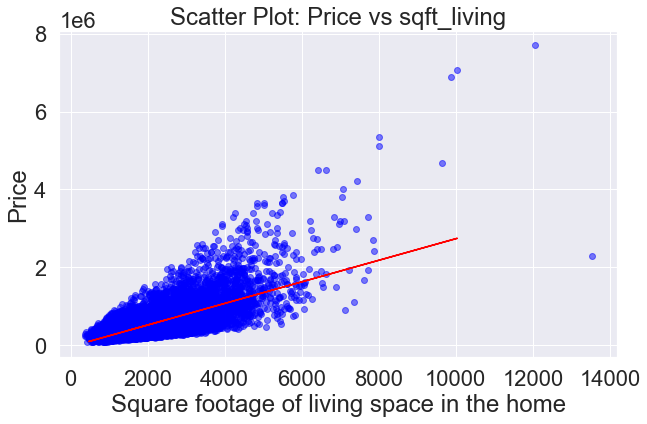

In [60]:
#simple linear regression for price against Square footage of living space in the home

def simple_linear_regressions(x, y):
    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.title('Scatter Plot: Price vs sqft_living')
    plt.xlabel('Square footage of living space in the home')
    plt.ylabel('Price')
    plt.grid(True)
    
    # Add constant term to the independent variable
    x = sm.add_constant(x)
    
    # Split data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Fit model on training data
    model = sm.OLS(y_train, x_train)
    results = model.fit()
    
    # Print summary
    print(results.summary())

    # Predict on test data
    y_pred = results.predict(x_test)
    
    # Plot regression line
    plt.plot(x_test.iloc[:, 1], y_pred, color='red')
    plt.show()

# Usage example:
x = df[['sqft_living']]
y = df['price']
simple_linear_regressions(x, y)




In [61]:
new_df = df[['price', 'bathrooms', 'bedrooms', 'sqft_lot', 'sqft_living', 'grade_']]

feature_matrix = ["sqft_living"]
target_vector = "price"

X_sqft_living = df[feature_matrix]
y_sqft_living = df[target]

model_sqft = LinearRegression()
model_sqft.fit(X_sqft_living, y_sqft_living)

def make_living_prediction(sqft):
    data = {
        "Square feet of living area": sqft
    }
    df = pd.DataFrame(data, index=[0])
    prediction = model_sqft.predict(df).round(2)[0]
    return f"Predicted Price: ${prediction}"

In [62]:
make_living_prediction(4000)

'Predicted Price: $1080797.0'

In [63]:
interact(
    make_living_prediction,
    sqft = FloatSlider(
        min = X_sqft_living["sqft_living"].min(),
        max = X_sqft_living["sqft_living"].max(),
        step = 10,
        value = X_sqft_living["sqft_living"].mean(),
    ),
    
);

interactive(children=(FloatSlider(value=2083.766211025757, description='sqft', max=13540.0, min=370.0, step=10…

Regression Metrics and Model Explanation

The R-squared value measures the proportion of the variance in the dependent variable (price) that is predictable from the independent variable (square footage of living space). In this case, the R-squared value is 0.486, indicating that approximately 48.6% of the variance in house prices can be explained by the square footage of living space.
The coefficient of 277.2332 indicates that, on average, for each additional square foot of living space, the price of the house increases by $277.23.

The standard error measures the average deviation of the observed values from the regression line. A smaller standard error suggests that the model has a better fit to the data.

The t-value measures the significance of the coefficient. A higher absolute t-value indicates greater significance. In this case, the t-value for the coefficient of square footage of living space is high (115.813), indicating that it is statistically significant.

The p-value associated with the coefficient tests the null hypothesis that the coefficient is equal to zero. A lower p-value (typically less than 0.05) suggests that the coefficient is statistically significant. In this case, the p-value for the coefficient of square footage of living space is close to zero, indicating that it is statistically significant.

Overall, the linear regression model suggests that there is a significant positive relationship between the price of a house and its square footage of living space. The model explains approximately 48.6% of the variance in house prices, indicating that other factors not included in the model may also contribute to the variation in house prices.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     5431.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        09:27:01   Log-Likelihood:            -1.9922e+05
No. Observations:               14163   AIC:                         3.984e+05
Df Residuals:                   14161   BIC:                         3.985e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9750.6583   7651.315      1.274      0.2

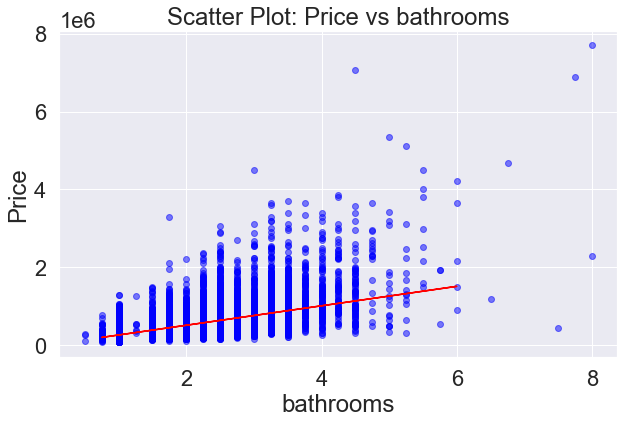

In [64]:
#simple linear regression for price against bathrooms

def simple_linear_regressions(x, y):
    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.title('Scatter Plot: Price vs bathrooms')
    plt.xlabel('bathrooms')
    plt.ylabel('Price')
    plt.grid(True)
    
    # Add constant term to the independent variable
    x = sm.add_constant(x)
    
    # Split data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Fit model on training data
    model = sm.OLS(y_train, x_train)
    results = model.fit()
    
    # Print summary
    print(results.summary())

    # Predict on test data
    y_pred = results.predict(x_test)
    
    # Plot regression line
    plt.plot(x_test.iloc[:, 1], y_pred, color='red')
    plt.show()

# Usage example:
x = df[['bathrooms']]
y = df['price']
simple_linear_regressions(x, y)


In [65]:
# Bathroom slider
feature_matrix = ["bathrooms"]
target_vector = "price"

X_bath = new_df[feature_matrix]
y_bath = new_df[target_vector]

model_bath = LinearRegression()
model_bath.fit(X_bath, y_bath)

def make_bath_prediction(bathrooms):
    data = {
        "Number of bedrooms": bathrooms
    }
    df = pd.DataFrame(data, index=[0])
    prediction = model_bath.predict(df).round(2)[0]
    return f"Predicted Price: ${prediction}"

In [66]:
make_bath_prediction(3)

'Predicted Price: $761626.04'

In [67]:
interact(
    make_bath_prediction,
    bathrooms = IntSlider(
        min = X_bath["bathrooms"].min(),
        max = X_bath["bathrooms"].max(),
        step = 1,
        value = X_bath["bathrooms"].mean(),
    ),
);

interactive(children=(IntSlider(value=2, description='bathrooms', max=8), Output()), _dom_classes=('widget-int…

Regression Metrics and Analysis

The coefficient of determination measures the proportion of the variance in the dependent variable (price) that is predictable from the independent variable (bathrooms). An R-squared of 0.277 indicates that approximately 27.7% of the variance in house prices can be explained by the number of bathrooms.
Bathrooms may be highly correlated with other features that also influence house prices, such as square footage or number of bedrooms. This multicollinearity can inflate coefficient estimates and make interpretation challenging.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     1412.
Date:                Thu, 02 May 2024   Prob (F-statistic):          1.15e-294
Time:                        09:27:45   Log-Likelihood:            -2.0084e+05
No. Observations:               14163   AIC:                         4.017e+05
Df Residuals:                   14161   BIC:                         4.017e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.44e+05   1.09e+04     13.171      0.0

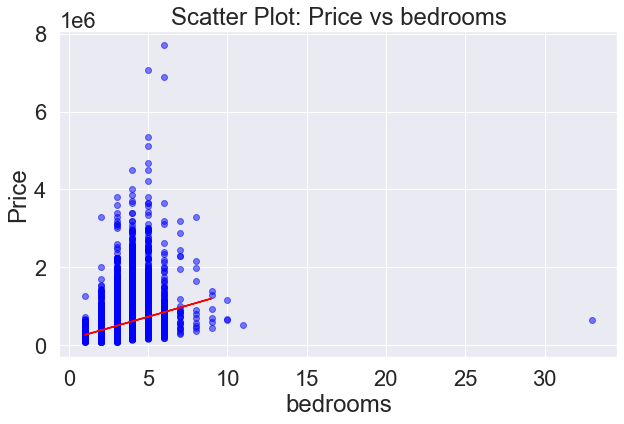

In [68]:
#simple linear regression for price against bedrooms
def simple_linear_regressions(x, y):
    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.title('Scatter Plot: Price vs bedrooms')
    plt.xlabel('bedrooms')
    plt.ylabel('Price')
    plt.grid(True)
    
    # Add constant term to the independent variable
    x = sm.add_constant(x)
    
    # Split data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Fit model on training data
    model = sm.OLS(y_train, x_train)
    results = model.fit()
    
    # Print summary
    print(results.summary())

    # Predict on test data
    y_pred = results.predict(x_test)
    
    # Plot regression line
    plt.plot(x_test.iloc[:, 1], y_pred, color='red')
    plt.show()

# Usage example:
x = df[['bedrooms']]
y = df['price']
simple_linear_regressions(x, y)


In [69]:
# Bedrooms slider
feature_matrix = ["bedrooms"]
target_vector = "price"

X_bedroom = new_df[feature_matrix]
y_bedroom = new_df[target_vector]

model_bedroom = LinearRegression()
model_bedroom.fit(X_bedroom, y_bedroom)

def make_bedrooms_prediction(bedrooms):
    data = {
        "Number of bedrooms": bedrooms
    }
    df = pd.DataFrame(data, index=[0])
    prediction = model_bedroom.predict(df).round(2)[0]
    return f"Predicted Price: ${prediction}"

In [70]:
make_bedrooms_prediction(5)

'Predicted Price: $736103.88'

In [71]:
interact(
    make_bedrooms_prediction,
    bedrooms = IntSlider(
        min = X_bedroom["bedrooms"].min(),
        max = X_bedroom["bedrooms"].max(),
        step = 1,
        value = X_bedroom["bedrooms"].mean(),
    ),
);

interactive(children=(IntSlider(value=3, description='bedrooms', max=33, min=1), Output()), _dom_classes=('wid…

### Multiple Linear Regression

In [72]:
def multiple_linear_regression(new_df):

    # df = df.apply(pd.to_numeric, errors='coerce')

    # Independent variables (features)
   

    x = new_df.drop(columns = 'price')

    # Dependent variable (target)
    y = new_df["price"]
    
    # Add constant term to the independent variable
    
    # Split data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Fit model on training data
    model = sm.OLS(y_train,  sm.add_constant(x_train))
    results = model.fit()
    
    # Print summary
    print(results.summary())

    # Predict on test data
    y_pred = results.predict(sm.add_constant(x_test))
    
multiple_linear_regression(new_df)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     3299.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        09:28:18   Log-Likelihood:            -1.9605e+05
No. Observations:               14163   AIC:                         3.921e+05
Df Residuals:                   14157   BIC:                         3.922e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.667e+05   1.85e+04    -25.158      

In [73]:
# MLR slider and dropdown
X = new_df.drop(columns='price')
y = new_df["price"]

# Create the linear regression model
model_MLR = LinearRegression()
model_MLR.fit(X, y)

def make_MLR_prediction(bathrooms, bedrooms, sqft_lot, sqft_living, grade_):
    data = {
        "Number of Bathrooms": bathrooms,
        "Number of Bedrooms": bedrooms,
        "Square feet of the lot": sqft_lot,
        "Square feet of living area": sqft_living,
        "Overall Grade of the House": grade_
    }
    df = pd.DataFrame(data, index=[0])
    prediction = model_MLR.predict(df).round(2)[0]
    return f"Predicted Price: ${prediction}"

# Example usage
predicted_price = make_MLR_prediction(5, 4, 4000.0, 6000.0, 7)
print(predicted_price)


Predicted Price: $1300770.15


In [74]:
interact(
    make_MLR_prediction,
    bathrooms = IntSlider(
        min = X["bathrooms"].min(),
        max = X["bathrooms"].max(),
        step = 1,
        value = X["bathrooms"].mean(),
    ),
    bedrooms = IntSlider(
        min = X["bedrooms"].min(),
        max = X["bedrooms"].max(),
        step = 1,
        value = X["bedrooms"].mean(),
    ),
    sqft_lot = FloatSlider(
        min = X["sqft_lot"].min(),
        max = X["sqft_lot"].max(),
        step = 100,
        value = X["sqft_lot"].mean(),
    ),
    sqft_living = FloatSlider(
        min = X["sqft_living"].min(),
        max = X["sqft_living"].max(),
        step = 100,
        value = X["sqft_living"].mean(),
    ),
    grade_ = Dropdown(
        options = sorted(X["grade_"].unique())
    )
    
);

interactive(children=(IntSlider(value=2, description='bathrooms', max=8), IntSlider(value=3, description='bedr…

Checking for Multicollinearity

In [75]:
# creating a function that takes in a dataframe and threshold and returns top correlations 

def corr_check(df, threshold):
    '''
    Enter dataframe and threshold for correlation
    Returns table of the highly correlated pairs
    '''
    corr_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
    corr_df.set_index(['pairs'], inplace = True)
    corr_df.drop(columns=['level_1', 'level_0'], inplace = True)
    corr_df.columns = ['cc']
    corr_df = corr_df.drop_duplicates()
    corr_df = corr_df[(corr_df['cc'] > threshold) & (corr_df['cc'] < 1)]
    return corr_df

corr_check(new_df, .7)



,cc
pairs,
"(sqft_living, grade_)",0.763506
"(bathrooms, sqft_living)",0.753430
"(sqft_living, price)",0.703204



When designing this MLE algorithm to predict house prices, we should consider the correlation between features and the objective of the analysis.
In this context, focusing on features directly related to the physical attributes of the property, such as 'sqft_living' and 'bathrooms',
aligns better with the objective of predicting house prices. 
Additionally, considering the other pairs of correlations provided, features like 'sqft_living' and 'bathrooms' also have strong correlations with the target variable 'price'. Therefore, prioritizing these features in the model might be more beneficial for accurately predicting house prices.
Thus, excluding 'grade_' helps mitigate multicollinearity and enhances the interpretability and predictive performance of the model.


In [76]:
# dropping grade_ column due to multicollinearity
new_df = new_df.drop(['grade_'], axis=1)

In [77]:
# Using linear regression

lr = LinearRegression()

In [78]:
# Our model needs to have only numeric variables. 

def only_numeric(df):

    '''returns a dataframe with only numeric values'''
    
    for column in df.columns:
        if is_numeric_dtype(df[column]) == False:
            df = df.drop(column, axis=1)
        else:
            continue
    return df


In [79]:
def split_target_predictors(data, target_column):
    '''Splits a DataFrame into target (y) and predictor (X) DataFrames.'''
    y = data['price']
    X = data.drop(columns=['price'])
    return y, X


In [80]:


def calculate_metrics(lr_model, X_train, X_test, y_train, y_test):
    '''Calculates R-squared and RMSE metrics for training and test sets'''
    
    # Fit the linear regression model on the training data
    lr_model.fit(X_train, y_train)
    
    # Predictions on training and test sets
    y_pred_train = lr_model.predict(X_train)
    y_pred_test = lr_model.predict(X_test)
    
    # Calculate R-squared for training and test sets
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Calculate RMSE for training and test sets
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    return train_r2, test_r2, train_rmse, test_rmse


In [81]:
def train_test_compare(X_tr, X_te, y_tr, y_te):
    '''Performs multiple regression on the split test and prints metrics'''
    lr.fit(X_tr, y_tr)
    train_score = lr.score(X_tr, y_tr)
    test_score = lr.score(X_te, y_te)
    y_hat_train = lr.predict(X_tr)
    y_hat_test = lr.predict(X_te)
    train_rmse = np.sqrt(mean_squared_error(y_tr, y_hat_train))
    test_rmse = np.sqrt(mean_squared_error(y_te, y_hat_test))
    print(f' training data R2: {train_score}\n testing data R2: {test_score} \
                    \n training data rmse: {train_rmse}\n testing data rmse: {test_rmse}')
    

    inter = lr.intercept_
    stats = sm.OLS(y_tr, sm.add_constant(X_tr)).fit()
    summary = stats.summary()
    print(summary)

 # Create a scatter plot comparing the predicted values to the actual values for both the training and testing data.
    plt.figure(figsize=(10, 6))

    plt.scatter(y_tr, y_hat_train, alpha=0.5, color='#00BFFF', label='train')
    sns.regplot(x=y_tr, y=y_hat_train, scatter=False, color='r', label='train fit')

    plt.scatter(y_te, y_hat_test, alpha=0.5, color='#FFC0CB', label='test')
    sns.regplot(x=y_te, y=y_hat_test, scatter=False, color='g', label='test fit')

    plt.scatter(x=y, y=y, color='maroon', alpha=0.3, label='actual')

    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual Price vs Predicted Price')

    plt.legend()
    plt.grid()
    plt.show()


In [84]:
def train_test(data, size=.2):
    '''Takes in dataframe, and size of test for the split
        Returns the train_set and test_set'''
    train_set, test_set = train_test_split(data, test_size=size, random_state=42)
    return train_set, test_set



In [87]:
baseline = only_numeric(new_df)
baseline_train_set, baseline_test_set = train_test(baseline, .25)
train_set, test_set = train_test(new_df, .25)

In [88]:
y_train, X_train = split_target_predictors(baseline_train_set, 'price')
y_test, X_test = split_target_predictors(baseline_test_set, 'price')


 training data R2: 0.5053882479834793
 testing data R2: 0.5245625742089317                     
 training data rmse: 257391.78412868982
 testing data rmse: 256867.80969523257
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     3391.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        09:36:32   Log-Likelihood:            -1.8426e+05
No. Observations:               13278   AIC:                         3.685e+05
Df Residuals:                   13273   BIC:                         3.686e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err   

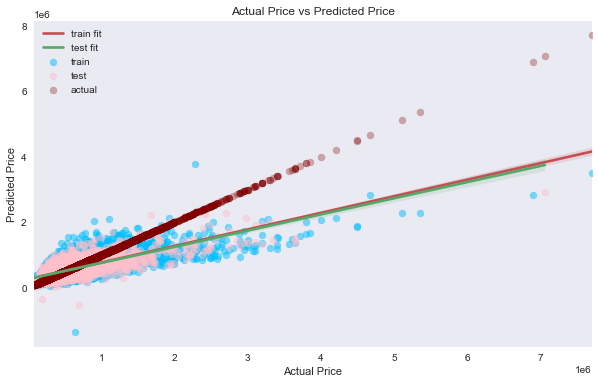

In [91]:
# Replace NaN values with mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)




train_test_compare(X_train_imputed, X_test_imputed, y_train, y_test)




The multiple linear regression model achieved an R-squared value of 0.508 on the training data and 0.512 on the testing data, indicating that around 51% of the variance in the target variable, price, is explained by the model. However, the root mean square error (RMSE) for both training and testing data is relatively high, with values of approximately 257,078 and 258,839, respectively. The regression coefficients suggest that variables bathrooms and bedrooms have the most significant impact on the price, as they have the largest magnitudes and smallest p-values. 






# RECOMMENDATIONS

When determining house prices, it's crucial to consider multiple factors like bedrooms, bathrooms, and living space size. Properties with more bedrooms and bathrooms tend to fetch higher prices, suggesting their desirability to buyers. Moreover, a positive correlation exists between living space size and house prices, indicating larger homes command higher values. However, it's vital to evaluate these factors alongside property condition, neighborhood amenities, and market trends for a comprehen


Bathrooms: The number of bathrooms has a positive effect on the price of the house, meaning that houses with more bathrooms tend to be priced higher. The agency may want to consider this factor when pricing and marketing homes with more bathrooms.

Living Area and Lot Size: The size of the living area has a positive effect on the price of the house, while the size of the lot has a negative effect. The agency may want to consider emphasizing the living area in their marketing efforts, while also being mindful of the lot size.

Floors: Houses with more floors tend to be priced higher. The agency may want to consider this factor when pricing and marketing multi-story homes.




## RECOMMENDATIONS

We will choose the second model as our best model and use in our recommendations as it explains the most variance:


Bathrooms: The number of bathrooms has a positive effect on the price of the house, meaning that houses with more bathrooms tend to be priced higher. The agency may want to consider this factor when pricing and marketing homes with more bathrooms.

Living Area and Lot Size: The size of the living area has a positive effect on the price of the house, while the size of the lot has a negative effect. The agency may want to consider emphasizing the living area in their marketing efforts, while also being mindful of the lot size.

Floors: Houses with more floors tend to be priced higher. The agency may want to consider this factor when pricing and marketing multi-story homes.

Condition and Grade: Houses with higher condition and grade ratings tend to be priced higher. The agency may want to emphasize these ratings in their marketing efforts and pricing strategy.

Age and Renovated: The age of the house and whether or not it has been renovated both have significant effects on the price of the house. The agency may want to consider these factors when pricing and marketing homes, particularly when comparing newer, renovated homes to older ones.

Waterfront View: Houses with a waterfront view are priced significantly higher than those without. The agency may want to emphasize this factor in their marketing efforts for waterfront properties.

Season: The season in which a house is sold can also affect the price, with spring selling for higher prices than fall. The agency may want to consider this factor when planning their marketing and pricing strategies throughout the year.

## Limitations


Some limitations of this model and analysis could include:

Limited variables: While this model includes many important variables that are known to impact house prices, there may be other factors that were not included in the analysis that could also have an effect on house prices.

Assumptions: The model assumes a linear relationship between the independent variables and the target variable. This may not always be the case, and there could be more complex, non-linear relationships between the variables that are not captured in this analysis.

Generalizability: The dataset used for this analysis was limited to a specific geographic area and time period. It may not be representative of other locations or time periods, which could limit the generalizability of the results.The data in the dataset is from 2014 and 2015. Therefore, it may not be able to account for changes in the housing market since then. As a result the model may not be able to predict the value of a house in 2022.

Causality: While the model can identify relationships between variables, it cannot prove causality. Therefore, it's important to be cautious about making causal claims based solely on the results of this model.

In order to improve the value of a house, we would need to understand the market (i.e. what buyers are looking for). Therefore, by not having this information, we are unable to advise our clients on the best renovations to make. It is possible to build the most expensive house in the world, but if it is not what buyers are looking for, then it will not be sold. There is no value in that.

## Conclusion

